<a href="https://colab.research.google.com/github/databyhuseyn/DeepLearning/blob/main/Introduction_to_Deep_Learning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch

In [3]:
A = torch.tensor([
    [1.0, 4.0, 7.0],
    [2.0, 3.0, 6.0]
])

In [4]:
A

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [5]:
X = torch.tensor([
    [1.0, 4.0, 7.0],
     [2.0, 3.0, 6.0]
], dtype=torch.bfloat16)

In [6]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [7]:
X.shape

torch.Size([2, 3])

In [8]:
X.dtype

torch.bfloat16

In [9]:
X[0, 1]

tensor(4., dtype=torch.bfloat16)

In [10]:
X[:, 1]

tensor([4., 3.], dtype=torch.bfloat16)

In [11]:
X.abs()

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [12]:
torch.abs(X)

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [13]:
# torch.cos(), torch.exp(), torch.max(), torch.mean(), torch.sqrt()

In [14]:
X.sqrt()

tensor([[1.0000, 2.0000, 2.6406],
        [1.4141, 1.7344, 2.4531]], dtype=torch.bfloat16)

In [15]:
10 * (X + 1.0)

tensor([[20., 50., 80.],
        [30., 40., 70.]], dtype=torch.bfloat16)

In [16]:
X.exp()

tensor([[   2.7188,   54.5000, 1096.0000],
        [   7.3750,   20.1250,  404.0000]], dtype=torch.bfloat16)

In [17]:
X.mean()

tensor(3.8281, dtype=torch.bfloat16)

In [18]:
X.max(dim=0) #, keepdim=True

torch.return_types.max(
values=tensor([2., 4., 7.], dtype=torch.bfloat16),
indices=tensor([1, 0, 0]))

In [19]:
X

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.bfloat16)

In [20]:
X @ X.T

tensor([[66., 56.],
        [56., 49.]], dtype=torch.bfloat16)

In [21]:
import numpy as np

In [22]:
A.numpy()

array([[1., 4., 7.],
       [2., 3., 6.]], dtype=float32)

In [23]:
torch.tensor(np.array([[1., 4., 7.],
                      [2., 3., 6.]]))

tensor([[1., 4., 7.],
        [2., 3., 6.]], dtype=torch.float64)

In [24]:
# It’s generally better to use 32 bits in deep learning because this takes half the RAM and speeds up computations,
# and neural nets do not actually need the extra precision offered by 64-bit floats.

In [25]:
N = torch.FloatTensor(np.array([            # automatically converts the array to 32 bits
                            [1., 4., 7.],
                            [2., 3., 6 ]
                              ]))
N

tensor([[1., 4., 7.],
        [2., 3., 6.]])

In [26]:
N.dtype

torch.float32

In [27]:
X[:, 1] = -99
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [28]:
X.relu()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [29]:
X

tensor([[  1., -99.,   7.],
        [  2., -99.,   6.]], dtype=torch.bfloat16)

In [30]:
X.relu_()

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [31]:
X    # _ changed in place

tensor([[1., 0., 7.],
        [2., 0., 6.]], dtype=torch.bfloat16)

In [32]:
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

In [33]:
device

'cuda'

In [34]:
!nvidia-smi   # watch -n 1 nvidia-smi

Thu Feb  5 10:46:55 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [35]:
M = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
])
M = M.to(device)

In [36]:
M

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

In [37]:
M.device

device(type='cuda', index=0)

In [38]:
M = torch.tensor([[1., 2., 3.], [4., 5., 6.]], device=device)

In [39]:
R = M @ M.T

In [40]:
R

tensor([[14., 32.],
        [32., 77.]], device='cuda:0')

In [41]:
M = torch.rand((1000, 1000))  # on the CPU
%timeit M @ M.T


M = torch.rand((1000, 1000), device="cuda")  # on the GPU
%timeit M @ M.T

# now try 100 by 100 :D

28.6 ms ± 5.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
531 µs ± 8.24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [42]:
x = torch.tensor(5.0, requires_grad=True)
f = x ** 2
f

tensor(25., grad_fn=<PowBackward0>)

In [43]:
f.backward()
x.grad

tensor(10.)

In [44]:
learning_rate = 0.1
with torch.no_grad():
    x -= learning_rate * x.grad  # gradient descent step

In [45]:
x

tensor(4., requires_grad=True)

In [46]:
x_detached = x.detach()
x_detached -= learning_rate * x.grad   # detach yaddashda eyni yerdedi

In [47]:
x_detached

tensor(3.)

In [48]:
x.grad.zero_()

tensor(0.)

In [49]:
learning_rate = 0.1
x = torch.tensor(5.0, requires_grad=True)
for iteration in range(100):
    f = x ** 2  # forward pass
    f.backward()  # backward pass
    with torch.no_grad():
        x -= learning_rate * x.grad  # gradient descent step
    print(x)
    # print(x.grad)
    x.grad.zero_()  # reset the gradients

tensor(4., requires_grad=True)
tensor(3.2000, requires_grad=True)
tensor(2.5600, requires_grad=True)
tensor(2.0480, requires_grad=True)
tensor(1.6384, requires_grad=True)
tensor(1.3107, requires_grad=True)
tensor(1.0486, requires_grad=True)
tensor(0.8389, requires_grad=True)
tensor(0.6711, requires_grad=True)
tensor(0.5369, requires_grad=True)
tensor(0.4295, requires_grad=True)
tensor(0.3436, requires_grad=True)
tensor(0.2749, requires_grad=True)
tensor(0.2199, requires_grad=True)
tensor(0.1759, requires_grad=True)
tensor(0.1407, requires_grad=True)
tensor(0.1126, requires_grad=True)
tensor(0.0901, requires_grad=True)
tensor(0.0721, requires_grad=True)
tensor(0.0576, requires_grad=True)
tensor(0.0461, requires_grad=True)
tensor(0.0369, requires_grad=True)
tensor(0.0295, requires_grad=True)
tensor(0.0236, requires_grad=True)
tensor(0.0189, requires_grad=True)
tensor(0.0151, requires_grad=True)
tensor(0.0121, requires_grad=True)
tensor(0.0097, requires_grad=True)
tensor(0.0077, requires_

In [50]:
t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z += 1  # this is an in-place operation
z.backward()  #  RuntimeError!

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.FloatTensor []], which is output 0 of ExpBackward0, is at version 1; expected version 0 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).

In [51]:
# but

t = torch.tensor(2.0, requires_grad=True)
z = t.exp()  # this is an intermediate result
z = z + 1  # new tensor created, and previous saved for computation graph
z.backward()

# make sure you don’t modify in place a tensor needed for backprop

In [52]:
import sklearn

In [53]:
X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)

In [54]:
X_train_full, X_test, y_train_full, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

In [55]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X_train_full, y_train_full, test_size=0.2)

In [56]:
X_train.shape, X_valid.shape, X_test.shape

((13209, 8), (3303, 8), (4128, 8))

In [57]:
X_train = torch.FloatTensor(X_train)
X_valid = torch.FloatTensor(X_valid)
X_test = torch.FloatTensor(X_test)
means = X_train.mean(dim=0, keepdims=True)
stds = X_train.std(dim=0, keepdims=True)
X_train = (X_train - means) / stds
X_valid = (X_valid - means) / stds
X_test = (X_test - means) / stds

In [58]:
y_train = torch.FloatTensor(y_train).reshape(-1, 1)
y_valid = torch.FloatTensor(y_valid).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)


In [59]:
torch.manual_seed(42)
n_features = X_train.shape[1]
w = torch.randn((n_features, 1), requires_grad=True)
b = torch.tensor(0., requires_grad=True)

In [60]:
learning_rate = 0.4
n_epochs = 20
for epoch in range(n_epochs):
  y_pred = X_train @ w + b
  loss = ((y_pred - y_train) ** 2).mean()
  loss.backward()
  with torch.no_grad():
    b -= learning_rate * b.grad
    w -= learning_rate * w.grad
    b.grad.zero_()
    w.grad.zero_()
  print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')



Epoch 1/20, Loss: 16.070011138916016
Epoch 2/20, Loss: 4.798820972442627
Epoch 3/20, Loss: 2.190678834915161
Epoch 4/20, Loss: 1.2816020250320435
Epoch 5/20, Loss: 0.9293467998504639
Epoch 6/20, Loss: 0.7817180156707764
Epoch 7/20, Loss: 0.7126951217651367
Epoch 8/20, Loss: 0.6751704812049866
Epoch 9/20, Loss: 0.6510710120201111
Epoch 10/20, Loss: 0.6332882046699524
Epoch 11/20, Loss: 0.618930459022522
Epoch 12/20, Loss: 0.6067549586296082
Epoch 13/20, Loss: 0.5961748361587524
Epoch 14/20, Loss: 0.5868720412254333
Epoch 15/20, Loss: 0.5786449313163757
Epoch 16/20, Loss: 0.5713469386100769
Epoch 17/20, Loss: 0.5648611187934875
Epoch 18/20, Loss: 0.5590896010398865
Epoch 19/20, Loss: 0.5539479851722717
Epoch 20/20, Loss: 0.5493630766868591


In [61]:
X_new = X_test[:3]
with torch.no_grad():
  y_pred = X_new @ w + b

y_pred

tensor([[1.1358],
        [1.7632],
        [1.5017]])

In [62]:
y_test[:3]

tensor([[1.1850],
        [1.7890],
        [2.6970]])

In [63]:
import torch.nn as nn

In [64]:
torch.manual_seed(42)
model = nn.Linear(in_features = n_features, out_features=1)

In [65]:
model.bias

Parameter containing:
tensor([0.3117], requires_grad=True)

In [66]:
model.weight

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [67]:
model.parameters()

<generator object Module.parameters at 0x7fdbc60073e0>

In [68]:
next(model.parameters())

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)

In [69]:
for param in model.parameters():
  print(param)

Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
Parameter containing:
tensor([0.3117], requires_grad=True)


In [70]:
for name, param in model.named_parameters():
  print(f'{name} | {param}')

weight | Parameter containing:
tensor([[ 0.2703,  0.2935, -0.0828,  0.3248, -0.0775,  0.0713, -0.1721,  0.2076]],
       requires_grad=True)
bias | Parameter containing:
tensor([0.3117], requires_grad=True)


In [71]:
model(X_train[:2])

tensor([[1.1220],
        [2.2988]], grad_fn=<AddmmBackward0>)

In [72]:
y_train[:2]

tensor([[0.8750],
        [5.0000]])

In [73]:
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [74]:
model(X_train[:2])

tensor([[1.1220],
        [2.2988]], grad_fn=<AddmmBackward0>)

In [75]:
def train_bgd(model, optimizer, criterion, X_train, y_train, n_epochs):
  for epoch in range(n_epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    print(f'Epoch {epoch+1}/{n_epochs}, Loss: {loss.item()}')

In [76]:
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.216801643371582
Epoch 2/20, Loss: 0.7511668801307678
Epoch 3/20, Loss: 0.6007561087608337
Epoch 4/20, Loss: 0.5827463865280151
Epoch 5/20, Loss: 0.5730975866317749
Epoch 6/20, Loss: 0.5653751492500305
Epoch 7/20, Loss: 0.5587740540504456
Epoch 8/20, Loss: 0.5530203580856323
Epoch 9/20, Loss: 0.5479665398597717
Epoch 10/20, Loss: 0.5435122847557068
Epoch 11/20, Loss: 0.5395792126655579
Epoch 12/20, Loss: 0.5361024141311646
Epoch 13/20, Loss: 0.5330262184143066
Epoch 14/20, Loss: 0.5303024649620056
Epoch 15/20, Loss: 0.5278887152671814
Epoch 16/20, Loss: 0.5257481932640076
Epoch 17/20, Loss: 0.5238483548164368
Epoch 18/20, Loss: 0.5221609473228455
Epoch 19/20, Loss: 0.5206608176231384
Epoch 20/20, Loss: 0.5193261504173279


In [77]:
X_new = X_test[:3]

with torch.no_grad():
  y_pred = model(X_new)

y_pred

tensor([[0.8514],
        [1.8541],
        [1.5346]])

In [78]:
y_test[:3]

tensor([[1.1850],
        [1.7890],
        [2.6970]])

In [79]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(n_features,50),
    nn.ReLU(),
    nn.Linear(50, 40),
    nn.ReLU(),
    nn.Linear(40, 1)
)

In [80]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()
train_bgd(model, optimizer, mse, X_train, y_train, n_epochs)

Epoch 1/20, Loss: 4.919306755065918
Epoch 2/20, Loss: 2.0540974140167236
Epoch 3/20, Loss: 1.0155830383300781
Epoch 4/20, Loss: 0.8653802275657654
Epoch 5/20, Loss: 0.7794921398162842
Epoch 6/20, Loss: 0.7260838747024536
Epoch 7/20, Loss: 0.6918206810951233
Epoch 8/20, Loss: 0.66910320520401
Epoch 9/20, Loss: 0.6533443331718445
Epoch 10/20, Loss: 0.6416725516319275
Epoch 11/20, Loss: 0.6324210166931152
Epoch 12/20, Loss: 0.6245934367179871
Epoch 13/20, Loss: 0.6176721453666687
Epoch 14/20, Loss: 0.6113358736038208
Epoch 15/20, Loss: 0.6054325699806213
Epoch 16/20, Loss: 0.5998631715774536
Epoch 17/20, Loss: 0.594556987285614
Epoch 18/20, Loss: 0.5894628167152405
Epoch 19/20, Loss: 0.584556519985199
Epoch 20/20, Loss: 0.5798228979110718


# Making it MiniBatches

In [81]:
from torch.utils.data import TensorDataset, DataLoader

In [82]:
train_dataset = TensorDataset(X_train, y_train)

In [83]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [84]:
torch.manual_seed(42)
model = nn.Sequential(
    nn.Linear(in_features = n_features, out_features = 64),
    nn.ReLU(),
    nn.Linear(in_features = 64, out_features = 32),
    nn.ReLU(),
    nn.Linear(in_features = 32, out_features = 1)
)

model.to(device)

Sequential(
  (0): Linear(in_features=8, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=1, bias=True)
)

In [85]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
mse = nn.MSELoss()

In [86]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  model.train()
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch, y_batch in train_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      loss = criterion(y_pred, y_batch)
      total_loss += loss.item()
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')

In [87]:
train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:0.6429
Epoch 2/20, Loss:0.4360
Epoch 3/20, Loss:0.4035
Epoch 4/20, Loss:0.3870
Epoch 5/20, Loss:0.3751
Epoch 6/20, Loss:0.3629
Epoch 7/20, Loss:0.3576
Epoch 8/20, Loss:0.3487
Epoch 9/20, Loss:0.3412
Epoch 10/20, Loss:0.3370
Epoch 11/20, Loss:0.3336
Epoch 12/20, Loss:0.3266
Epoch 13/20, Loss:0.3215
Epoch 14/20, Loss:0.3181
Epoch 15/20, Loss:0.3141
Epoch 16/20, Loss:0.3111
Epoch 17/20, Loss:0.3108
Epoch 18/20, Loss:0.3111
Epoch 19/20, Loss:0.3050
Epoch 20/20, Loss:0.3026


In [88]:
import torch
print(torch.cuda.is_available())


True


In [89]:
# LET'S EVALUATE our model

def evaluate(model, data_loader, metric_fn, aggregate_fn=torch.mean):
  model.eval()
  metrics=[]
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric = metric_fn(y_pred, y_batch)
      metrics.append(metric)
  return aggregate_fn(torch.stack(metrics))


In [90]:
valid_dataset = TensorDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=32)
valid_mse = evaluate(model, valid_loader, mse)
valid_mse

tensor(0.3577, device='cuda:0')

In [91]:
def rmse(y_pred, y_true):
  return ((y_pred - y_true) ** 2).mean().sqrt()

In [92]:
evaluate(model, valid_loader, rmse)


tensor(0.5808, device='cuda:0')

In [93]:
0.3149 ** 0.5 != 0.5497

True

The reason is that instead of calculating the RMSE over the whole validation set, we computed it over each batch and then computed the mean of all these batch RMSEs

In [94]:
evaluate(model, valid_loader, mse,
         aggregate_fn=lambda metrics: torch.sqrt(torch.mean(metrics)))

tensor(0.5981, device='cuda:0')

In [95]:
0.3149 ** 0.5

0.561159513863928

In [96]:
%pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 59.0 MB/s eta 0:00:00


In [97]:
import torchmetrics

In [98]:
def evaluate_tm(model, data_loader, metric):
  model.eval()
  metric.reset()
  with torch.no_grad():
    for X_batch, y_batch in data_loader:
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)
      y_pred = model(X_batch)
      metric.update(y_pred, y_batch)
  return metric.compute()

In [99]:
rmse = torchmetrics.MeanSquaredError(squared=False).to(device)
evaluate_tm(model, valid_loader, rmse)

tensor(0.5999, device='cuda:0')

# Deep and Wide Networks

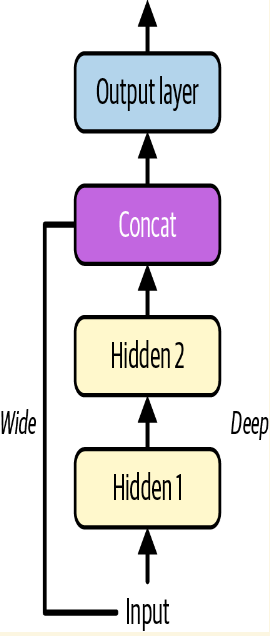

In [100]:
class WideAndDeep(nn.Module):
  def __init__(self, n_features):
    super().__init__()
    self.deep_stack = nn.Sequential(
        nn.Linear(n_features, 50),
        nn.ReLU(),
        nn.Linear(50, 40),
        nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + n_features, 1)

  def forward(self, X):
    deep_output = self.deep_stack(X)
    wide_and_deep = torch.concat([X, deep_output], dim=1)
    return self.output_layer(wide_and_deep)

In [101]:
[i for i in WideAndDeep(8).children()]

[Sequential(
   (0): Linear(in_features=8, out_features=50, bias=True)
   (1): ReLU()
   (2): Linear(in_features=50, out_features=40, bias=True)
   (3): ReLU()
 ),
 Linear(in_features=48, out_features=1, bias=True)]

In [102]:
[i for i in WideAndDeep(8).named_children()]

[('deep_stack',
  Sequential(
    (0): Linear(in_features=8, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=40, bias=True)
    (3): ReLU()
  )),
 ('output_layer', Linear(in_features=48, out_features=1, bias=True))]

In [103]:
torch.manual_seed(42)
model = WideAndDeep(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3235
Epoch 2/20, Loss:0.6087
Epoch 3/20, Loss:0.5656
Epoch 4/20, Loss:0.5362
Epoch 5/20, Loss:0.5163
Epoch 6/20, Loss:0.5009
Epoch 7/20, Loss:0.4883
Epoch 8/20, Loss:0.4793
Epoch 9/20, Loss:0.4702
Epoch 10/20, Loss:0.4651
Epoch 11/20, Loss:0.4564
Epoch 12/20, Loss:0.4494
Epoch 13/20, Loss:0.4457
Epoch 14/20, Loss:0.4394
Epoch 15/20, Loss:0.4343
Epoch 16/20, Loss:0.4315
Epoch 17/20, Loss:0.4257
Epoch 18/20, Loss:0.4220
Epoch 19/20, Loss:0.4183
Epoch 20/20, Loss:0.4156


In [104]:
class WideAndDeepV2(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide


  def forward(self, X):
    X_wide = X[:, :5]
    X_deep = X[:, 2:]

    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)


In [105]:
torch.manual_seed(42)
model = WideAndDeepV2(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader, n_epochs)

Epoch 1/20, Loss:1.3891
Epoch 2/20, Loss:0.6046
Epoch 3/20, Loss:0.5531
Epoch 4/20, Loss:0.5257
Epoch 5/20, Loss:0.5077
Epoch 6/20, Loss:0.4937
Epoch 7/20, Loss:0.4860
Epoch 8/20, Loss:0.4779
Epoch 9/20, Loss:0.4715
Epoch 10/20, Loss:0.4649
Epoch 11/20, Loss:0.4604
Epoch 12/20, Loss:0.4555
Epoch 13/20, Loss:0.4511
Epoch 14/20, Loss:0.4485
Epoch 15/20, Loss:0.4442
Epoch 16/20, Loss:0.4411
Epoch 17/20, Loss:0.4389
Epoch 18/20, Loss:0.4367
Epoch 19/20, Loss:0.4347
Epoch 20/20, Loss:0.4319


In [106]:
class WideAndDeepV3(nn.Module):
  def __init__(self, n_features):
    super().__init__()

    self.deep_stack = nn.Sequential(
        nn.Linear(n_features - 2, 50), nn.ReLU(),   # 6 features left
        nn.Linear(50, 40), nn.ReLU()
    )
    self.output_layer = nn.Linear(40 + 5, 1)   # 5 comes from wide

  def forward(self, X_wide, X_deep):
    deep_output = self.deep_stack(X_deep)
    wide_and_deep = torch.concat([X_wide, deep_output], dim=1)

    return self.output_layer(wide_and_deep)

In [107]:
train_data_wd = TensorDataset(X_train[:, :5], X_train[:, 2:], y_train)
train_loader_wd = DataLoader(train_data_wd, batch_size=32, shuffle=True)
valid_data_wd = TensorDataset(X_valid[:, :5], X_valid[:, 2:], y_valid)
valid_loader_wd = DataLoader(valid_data_wd, batch_size=32, shuffle=True)
test_data_wd = TensorDataset(X_test[:, :5], X_test[:, 2:], y_test)
test_loader_wd = DataLoader(test_data_wd, batch_size=32, shuffle=True)

In [108]:
def train(model, optimizer, criterion, train_loader, n_epochs):
  for epoch in range(n_epochs):
    total_loss = 0.
    for X_batch_wide, X_batch_deep, y_batch in train_loader:
      X_batch_wide, X_batch_deep, y_batch = X_batch_wide.to(device), X_batch_deep.to(device), y_batch.to(device)
      y_pred = model(X_batch_wide, X_batch_deep)
      loss = criterion(y_pred, y_batch)
      total_loss = total_loss + loss
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    mean_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch+1}/{n_epochs}, Loss:{mean_loss:.4f}')


In [109]:
torch.manual_seed(42)
model = WideAndDeepV3(n_features).to(device)
learning_rate = 0.002
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
mse = nn.MSELoss()

train(model, optimizer, mse, train_loader_wd, n_epochs)

Epoch 1/20, Loss:1.3891
Epoch 2/20, Loss:0.6046
Epoch 3/20, Loss:0.5531
Epoch 4/20, Loss:0.5257
Epoch 5/20, Loss:0.5077
Epoch 6/20, Loss:0.4937
Epoch 7/20, Loss:0.4860
Epoch 8/20, Loss:0.4779
Epoch 9/20, Loss:0.4715
Epoch 10/20, Loss:0.4649
Epoch 11/20, Loss:0.4604
Epoch 12/20, Loss:0.4555
Epoch 13/20, Loss:0.4511
Epoch 14/20, Loss:0.4485
Epoch 15/20, Loss:0.4442
Epoch 16/20, Loss:0.4411
Epoch 17/20, Loss:0.4389
Epoch 18/20, Loss:0.4367
Epoch 19/20, Loss:0.4347
Epoch 20/20, Loss:0.4319


In [110]:
class WideAndDeepDataset(torch.utils.data.Dataset):
  def __init__(self, X_wide, X_deep, y):
    self.X_wide = X_wide
    self.X_deep = X_deep
    self.y = y

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    input_dict = {"X_wide": self.X_wide[idx], "X_deep": self.X_deep[idx]}
    return input_dict, self.y[idx]


In [112]:
train_data_named = WideAndDeepDataset(X_wide = X_train[:, :5], X_deep = X_train[:, 2:], y=y_train)
valid_data_named = WideAndDeepDataset(X_wide = X_valid[:, :5], X_deep = X_valid[:, 2:], y=y_valid)
test_data_named = WideAndDeepDataset(X_wide = X_test[:, :5], X_deep = X_test[:, 2:], y=y_test)

train_loader_named = DataLoader(train_data_named, batch_size=32, shuffle=True)
valid_loader_named = DataLoader(valid_data_named, batch_size=32, shuffle=True)
test_loader_named = DataLoader(test_data_named, batch_size=32, shuffle=True)

In [131]:
import matplotlib.pyplot as plt

In [151]:
def train(model, optimizer, criterion, train_loader, n_epochs, plot_loss=False):
  losses = []
  for epoch in range(n_epochs):
    for inputs, y_batch in train_loader:
      inputs = {name: X.to(device) for name, X in inputs.items()}
      y_batch = y_batch.to(device)
      y_pred = model(X_wide=inputs['X_wide'], X_deep=inputs['X_deep'])
      loss = criterion(y_pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    losses.append(loss.item())
    print(f'Epoch {epoch + 1}/{n_epochs}, Loss: {loss}')

  if plot_loss:
    plt.figure(figsize=(8, 5))
    plt.title('Learning Progress')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(n_epochs),losses);



In [152]:
lr = 0.005
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
mse = nn.MSELoss()

Epoch 1/20, Loss: 0.13736915588378906
Epoch 2/20, Loss: 0.3119325637817383
Epoch 3/20, Loss: 0.09704426676034927
Epoch 4/20, Loss: 0.12839309871196747
Epoch 5/20, Loss: 0.09056252241134644
Epoch 6/20, Loss: 0.1357978731393814
Epoch 7/20, Loss: 0.14135299623012543
Epoch 8/20, Loss: 0.46115684509277344
Epoch 9/20, Loss: 0.2355676144361496
Epoch 10/20, Loss: 0.13511942327022552
Epoch 11/20, Loss: 0.35172972083091736
Epoch 12/20, Loss: 0.3802970349788666
Epoch 13/20, Loss: 0.3318909704685211
Epoch 14/20, Loss: 0.14351047575473785
Epoch 15/20, Loss: 0.2789357602596283
Epoch 16/20, Loss: 0.3810766041278839
Epoch 17/20, Loss: 0.1870603710412979
Epoch 18/20, Loss: 0.15194490551948547
Epoch 19/20, Loss: 0.11087887734174728
Epoch 20/20, Loss: 0.23205821216106415


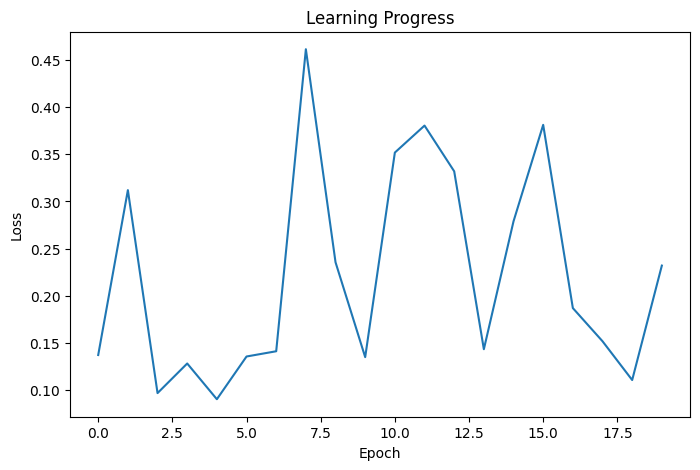

In [154]:
train(model, optimizer, mse, train_loader_named, 20, True)